In [226]:
import cvxpy as cp
import random
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Choosing any 10 risky assets from the market with the closing prices for your chosen assets over the past 3 months.

In [227]:
end_date = '2024-02-17'
start_date = '2023-11-17'
stocks = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS","INFY.NS", "ICICIBANK.NS", "HINDUNILVR.NS", "MRF.NS", "TATAMOTORS.NS", "SBIN.NS","IRCTC.NS"] #10 risky assets
prices = yf.download(stocks, start=start_date, end=end_date)['Close']  #closing price
print(prices)

[*********************100%%**********************]  10 of 10 completed

Ticker      HDFCBANK.NS  HINDUNILVR.NS  ICICIBANK.NS      INFY.NS    IRCTC.NS  \
Date                                                                            
2023-11-17  1505.099976    2528.800049    921.849976  1437.550049  707.349976   
2023-11-20  1505.199951    2506.449951    921.450012  1436.599976  701.299988   
2023-11-21  1517.949951    2505.250000    926.099976  1439.000000  708.950012   
2023-11-22  1512.550049    2521.899902    922.750000  1457.800049  700.000000   
2023-11-23  1521.300049    2519.899902    923.000000  1449.250000  700.000000   
...                 ...            ...           ...          ...         ...   
2024-02-12  1390.000000    2385.649902    996.099976  1680.099976  900.099976   
2024-02-13  1394.449951    2394.000000   1019.799988  1684.550049  910.450012   
2024-02-14  1384.050049    2387.949951   1022.700012  1666.199951  929.200012   
2024-02-15  1414.050049    2350.850098   1016.650024  1676.349976  951.500000   
2024-02-16  1419.900024    2

# Calculate the simple/log returns for each asset over the chosen period.

In [228]:
# Calculate simple returns
simple_returns = prices.pct_change().dropna()

# Calculate log returns
log_returns = np.log(prices / prices.shift(1)).dropna()

print("Simple Returns:")
print(simple_returns)

print("\nLog Returns:")
print(log_returns)

Simple Returns:
Ticker      HDFCBANK.NS  HINDUNILVR.NS  ICICIBANK.NS   INFY.NS  IRCTC.NS  \
Date                                                                       
2023-11-20     0.000066      -0.008838     -0.000434 -0.000661 -0.008553   
2023-11-21     0.008471      -0.000479      0.005046  0.001671  0.010908   
2023-11-22    -0.003557       0.006646     -0.003617  0.013065 -0.012624   
2023-11-23     0.005785      -0.000793      0.000271 -0.005865  0.000000   
2023-11-24     0.007099      -0.001865      0.006934 -0.008177 -0.010286   
...                 ...            ...           ...       ...       ...   
2024-02-12    -0.009689      -0.015882     -0.014445  0.006440 -0.041580   
2024-02-13     0.003201       0.003500      0.023793  0.002649  0.011499   
2024-02-14    -0.007458      -0.002527      0.002844 -0.010893  0.020594   
2024-02-15     0.021676      -0.015536     -0.005916  0.006092  0.023999   
2024-02-16     0.004137       0.010379      0.006492  0.015092 -0.011403

Visualising the data

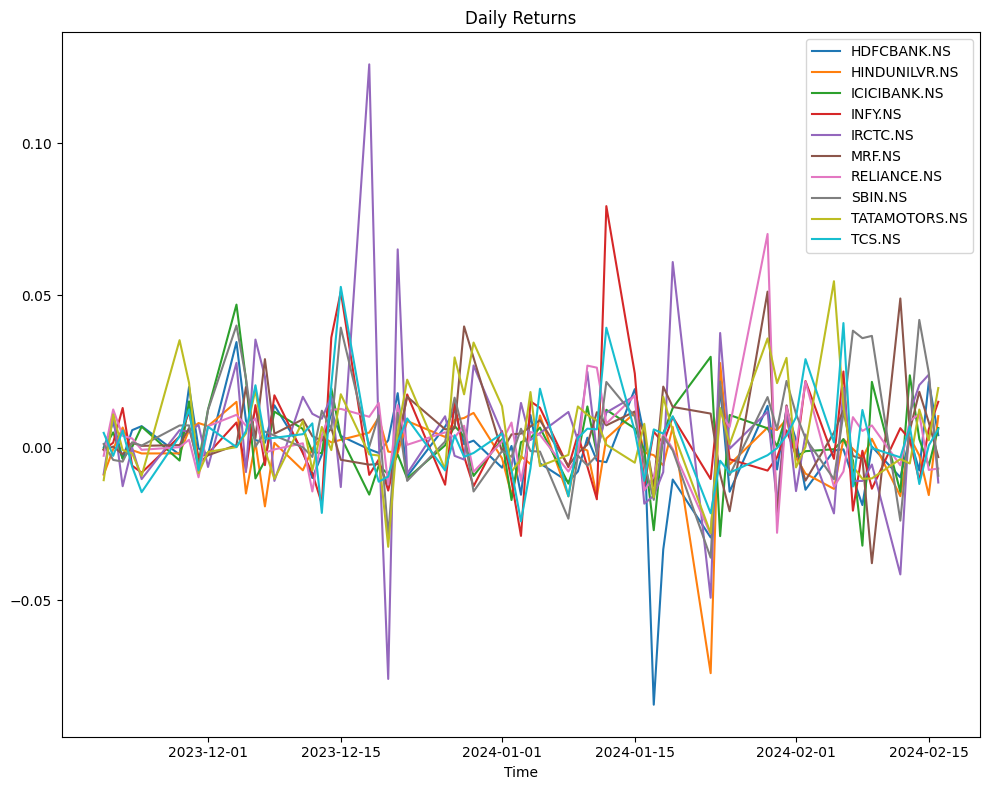

In [229]:
plt.figure(figsize=(10, 8))
for col in simple_returns.columns:
  plt.plot(simple_returns[col], label=col)
plt.title("Daily Returns")
plt.xlabel("Time")
plt.legend()

plt.show()

In [230]:
mu = simple_returns.mean()

In [231]:
print(mu)

Ticker
HDFCBANK.NS     -0.000825
HINDUNILVR.NS   -0.000941
ICICIBANK.NS     0.001798
INFY.NS          0.002911
IRCTC.NS         0.005038
MRF.NS           0.004769
RELIANCE.NS      0.003628
SBIN.NS          0.004946
TATAMOTORS.NS    0.005379
TCS.NS           0.002794
dtype: float64


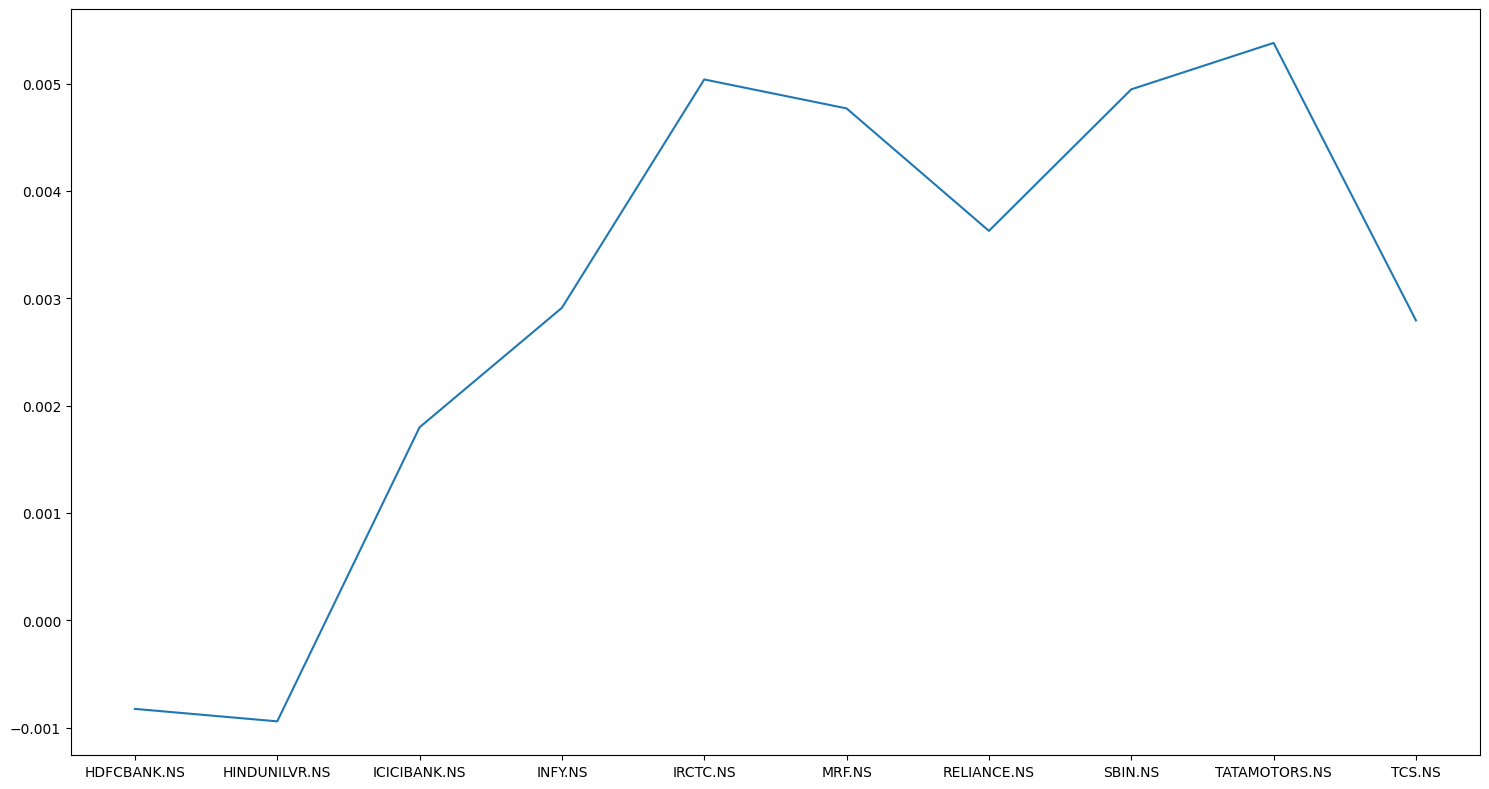

In [232]:
plt.figure(figsize=(15, 8))
plt.plot(mu)

In [233]:
var_daily_returns = simple_returns.var()
cov_matrix = simple_returns.cov()
std_dev_daily_returns = simple_returns.std()
correlation_matrix = simple_returns.corr()

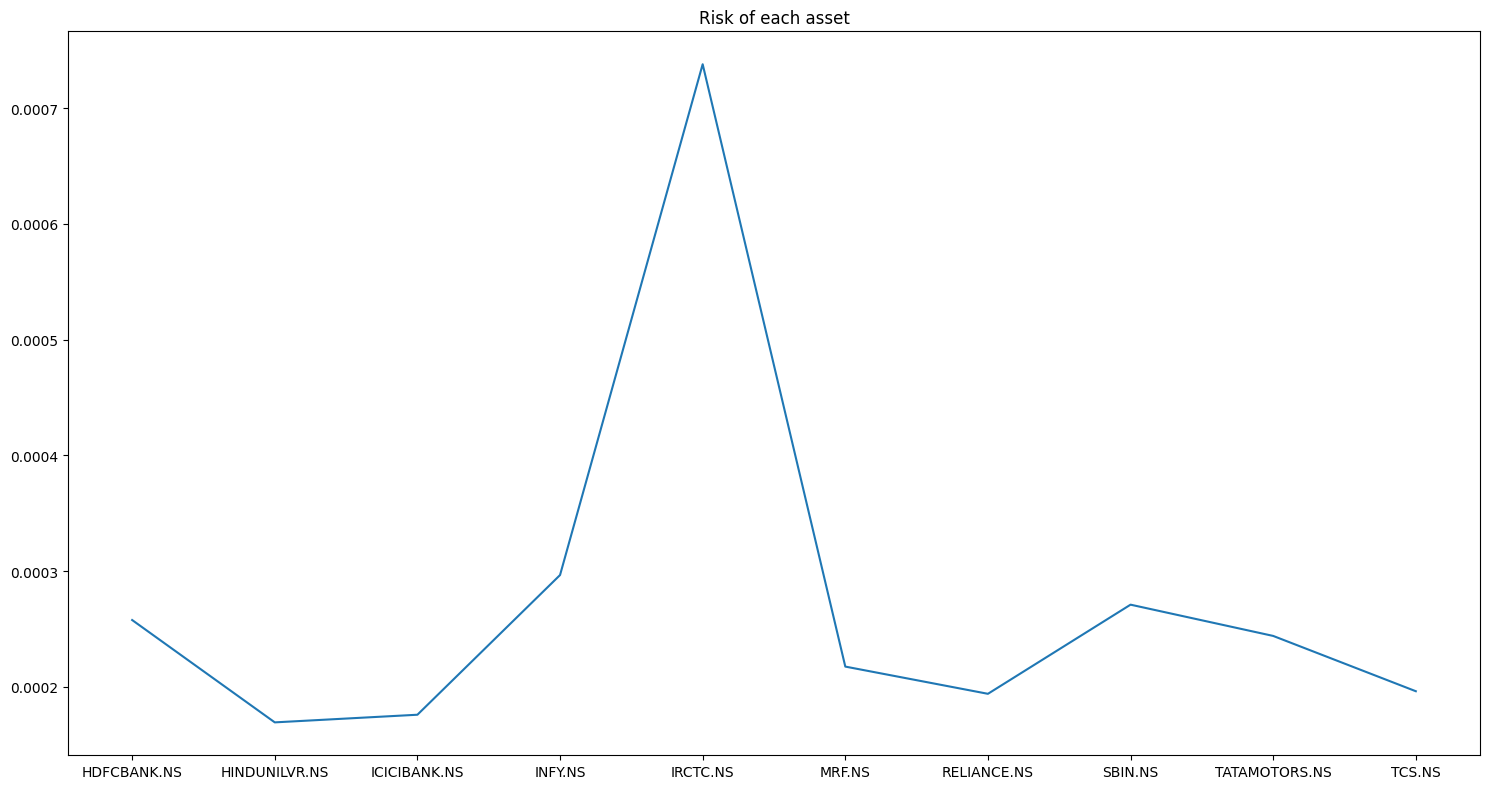

In [234]:
plt.figure(figsize=(15, 8))
plt.title("Risk of each asset")
plt.plot(var_daily_returns)

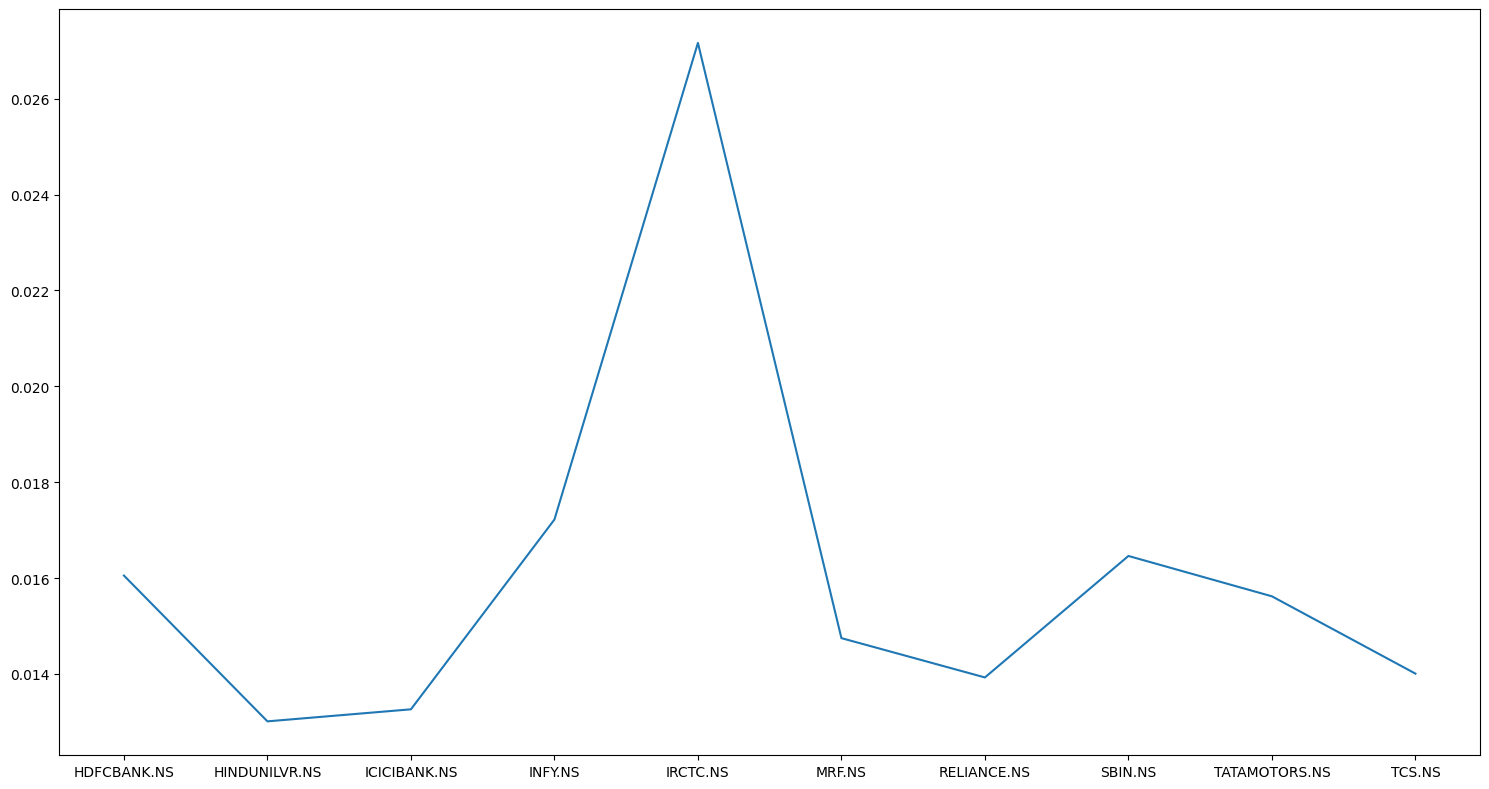

In [235]:
plt.figure(figsize=(15, 8))
plt.plot(std_dev_daily_returns)

In [236]:
cov_matrix

Ticker,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,IRCTC.NS,MRF.NS,RELIANCE.NS,SBIN.NS,TATAMOTORS.NS,TCS.NS
Ticker,,,,,,,,,,
HDFCBANK.NS,0.000258,0.000071,7.313446e-05,0.000038,0.000114,3.200358e-05,0.000069,0.000095,6.227161e-05,7.813203e-06
HINDUNILVR.NS,0.000071,0.000169,-1.762422e-05,0.000056,0.000120,-2.246249e-05,0.000056,0.000082,6.107274e-05,4.013180e-05
ICICIBANK.NS,0.000073,-0.000018,1.759031e-04,0.000028,-0.000012,9.160699e-06,0.000019,0.000041,7.305912e-07,1.428920e-05
INFY.NS,0.000038,0.000056,2.829449e-05,0.000297,0.000033,2.285787e-06,0.000029,0.000054,4.113018e-05,1.878265e-04
IRCTC.NS,0.000114,0.000120,-1.219200e-05,0.000033,0.000738,1.527126e-05,0.000121,0.000119,8.500368e-05,4.400458e-05
MRF.NS,0.000032,-0.000022,9.160699e-06,0.000002,0.000015,2.174935e-04,0.000054,-0.000021,7.174998e-05,-3.237967e-07
RELIANCE.NS,0.000069,0.000056,1.914151e-05,0.000029,0.000121,5.360066e-05,0.000194,0.000094,4.869666e-05,3.611187e-05
SBIN.NS,0.000095,0.000082,4.101182e-05,0.000054,0.000119,-2.070933e-05,0.000094,0.000271,3.776460e-05,6.067558e-05
TATAMOTORS.NS,0.000062,0.000061,7.305912e-07,0.000041,0.000085,7.174998e-05,0.000049,0.000038,2.439830e-04,4.263251e-05


 # Markowitz's mean-variance optimization to construct the efficient frontier.

In [237]:
C=cov_matrix

In [238]:
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

In [239]:
risks=[]
mus=[]
for i in range(10000):
  w= rand_weights(10)
  mu1= np.array(mu)@w.T
  sigma= w@C@w.T
  risks.append(sigma)
  mus.append(mu1)

Text(0.5, 1.0, 'Randomly generated portfolios')

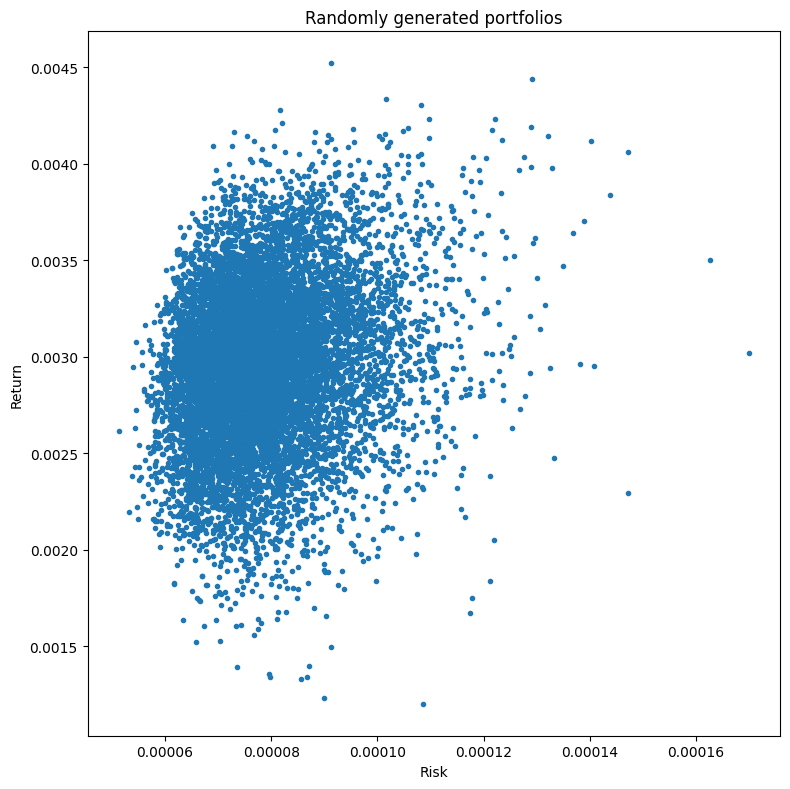

In [240]:
plt.subplots(figsize=(8,8))
plt.plot(risks, mus, '.')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Randomly generated portfolios')

In [241]:
O=np.array([1]*10)
a=(O@np.linalg.inv(C)@O.T)
b=(O@np.linalg.inv(C)@mu.T)
c=(mu@np.linalg.inv(C)@O.T)
d=(mu@np.linalg.inv(C)@mu.T)

In [242]:
mu=np.array(mu)
n_assets = 10
w = cp.Variable(n_assets)
mu1 = mu @ w  # expected return
objective = cp.Maximize(mu1)


frontier_weights = []
frontier_returns = []

for risk in risks:
    constraints = [cp.sum(w) == 1, cp.quad_form(w, C) <= risk]
    problem = cp.Problem(objective, constraints)
    try:
        problem.solve(solver=cp.ECOS)
        if problem.status == 'optimal':
            frontier_weights.append(w.value)
            frontier_returns.append(mu1.value)
    except:
        continue

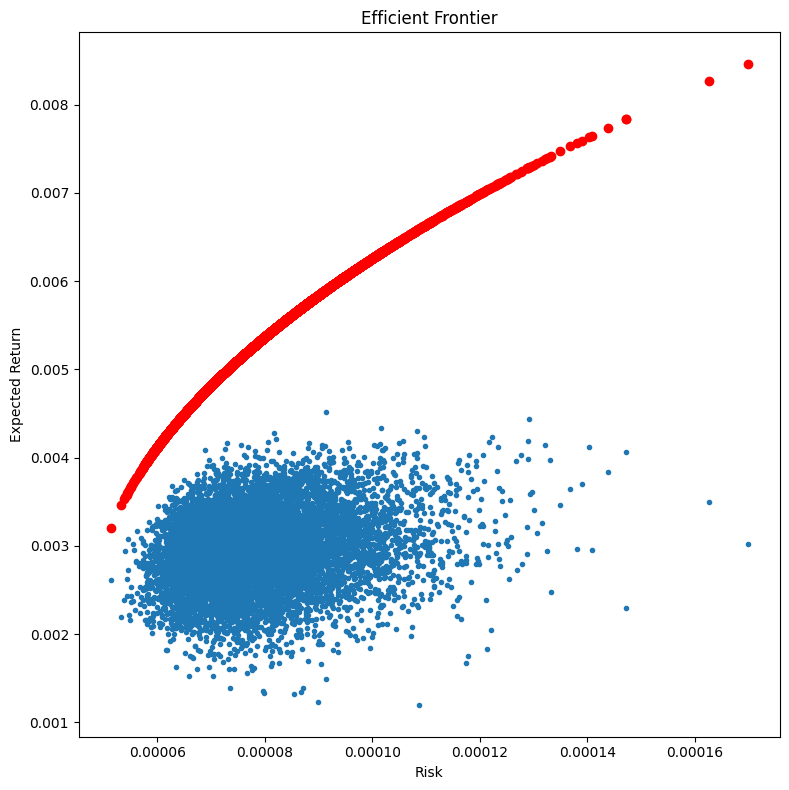

In [243]:
plt.subplots(figsize=(8,8))
plt.scatter(risks, frontier_returns,c='r')
plt.plot(risks, mus, '.')
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.show()

# Use the CAPM formula to calculate the expected return for each of your 10 risky assets.

For risk free asset we are chosing treasury bills allotment anouncement dated Feb 14, 2024. We will be going ahead with 91 days bill in this project, with yield = 7.05% p.a.

(1 + urf) ^ 365 = (1 + r_eff)

urf= (1 + r_eff) ^ (1 / 365) - 1

r_eff=7.05% p.a.

In [244]:
mu=np.array(mu)
urf=0.0002  ## risk free rate
w_der=(np.linalg.inv(C)@(mu.T-urf*O.T))/(O@np.linalg.inv(C)@(mu.T-urf*O.T))
print(w_der)

[-0.53605589 -0.5520742   0.20026762  0.27782595  0.15292301  0.37897837
  0.15507055  0.58560346  0.50412565 -0.16666453]


In [245]:
mu_der=mu@w_der
sigma_der=w_der.T@C@w_der

In [246]:
print(mu_der)

0.01041337886239616


In [247]:
print(sigma_der**(0.5))

0.016025777119494107


In [248]:
# Calculating return using CAPM for each asset
expect_returns_capm=[]
for i in range(len(stocks)):
  ek=[0]*10
  ek[i]=1
  beta=(np.array(ek)@(C)@w_der)/sigma_der
  # print(beta)
  expect_return = urf+beta*(mu_der-urf)
  expect_returns_capm.append(expect_return)

In [249]:
print(expect_returns_capm)

[-0.0008247352680439854, -0.0009408752318109901, 0.0017984010071026592, 0.0029113523402454623, 0.005038483189785917, 0.0047687187846039165, 0.003628011313353723, 0.004946310157503423, 0.005378780527297997, 0.002794029265083906]


Text(0, 0.5, 'Returns')

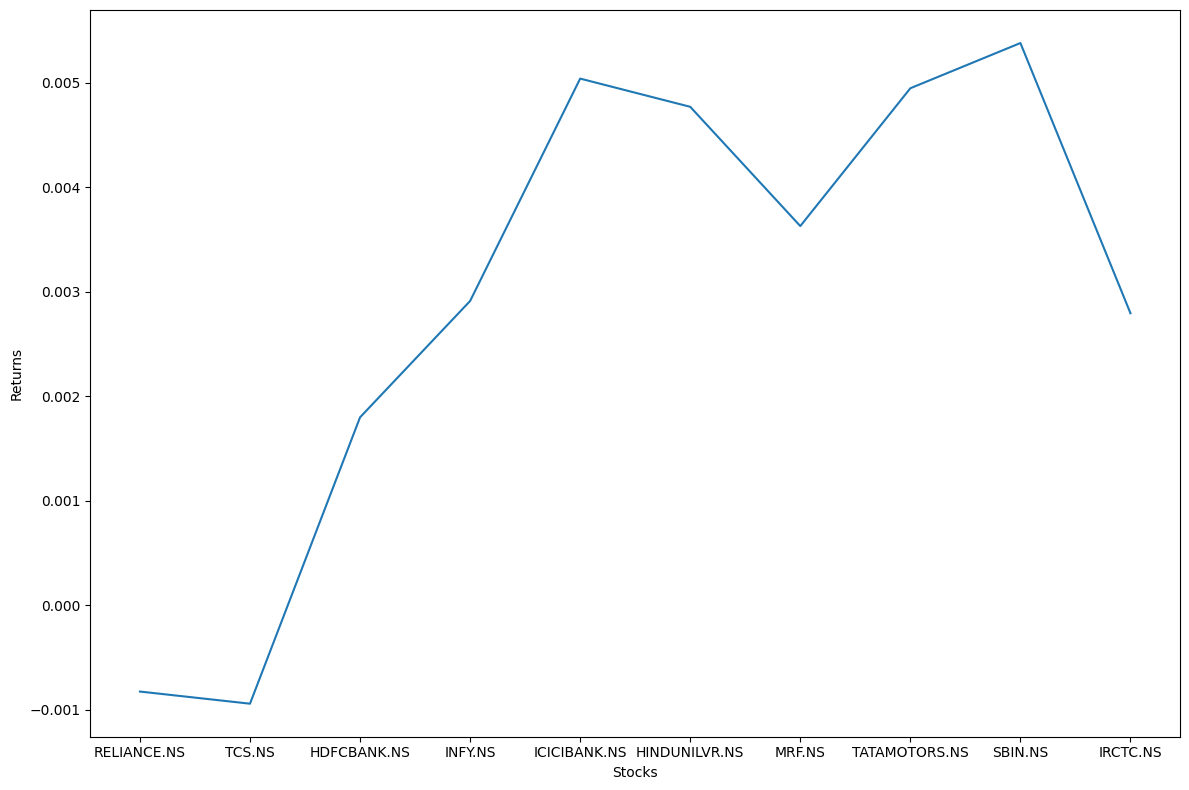

In [250]:
plt.figure(figsize=(12, 8))
plt.plot(stocks,expect_returns_capm)
plt.xlabel("Stocks")
plt.ylabel("Returns")

# Capital market line (CML)

In [251]:
risks=np.array(risks)

In [252]:
data={'Returns':frontier_returns,'Volatility':risks**(0.5)}  # resturns and standard deviation for 1000 portfolios
portfolios_V1=pd.DataFrame(data)
print(portfolios_V1.shape)
portfolios_V1.head()

(10000, 2)


,Returns,Volatility
0,0.006364,0.010136
1,0.004901,0.008452
2,0.004391,0.007972
3,0.005993,0.009673
4,0.004346,0.007933


In [94]:
mu=np.array(mu)
urf=0.0002
w_der=(np.linalg.inv(C)@(mu.T-urf*O.T))/(O@np.linalg.inv(C)@(mu.T-urf*O.T))
print(w_der)

[-0.53605589 -0.5520742   0.20026762  0.27782595  0.15292301  0.37897837
  0.15507055  0.58560346  0.50412565 -0.16666453]


In [95]:
mu_der=mu@w_der
sigma_der=w_der.T@C@w_der

In [253]:
print(mu_der)
print(sigma_der**(0.5))

0.01041337886239616
0.016025777119494107


In [118]:
sharpe_ratio=(mu_der-urf)/(sigma_der**(0.5))

In [119]:
sharpe_ratio

0.6373094288184241

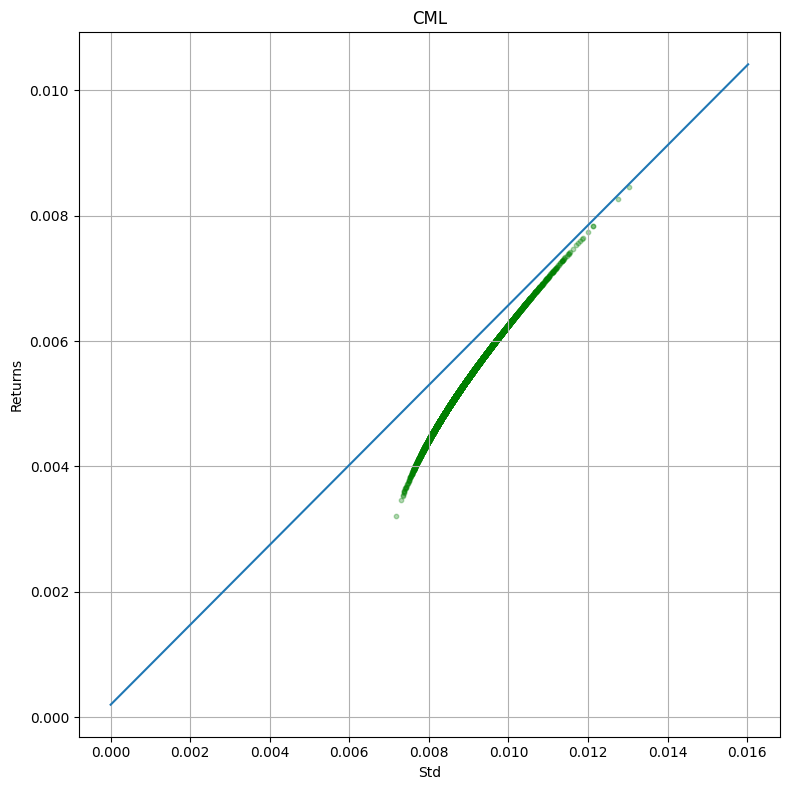

In [283]:
point1 = [0, urf]
point2 = [ sigma_der**(0.5),mu_der]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
# print(y_values)
plt.subplots(figsize=(8,8))
plt.scatter(portfolios_V1['Volatility'],portfolios_V1['Returns'],marker='o',s=10,alpha=0.3,color='green')


# Plot the line
plt.plot(x_values, y_values, label='Line')

plt.xlabel('Std')
plt.ylabel('Returns')
plt.title('CML')
plt.grid(True)
plt.show()

A more clear graph way

In [258]:
alpha=(c*(mu@np.linalg.inv(C))-d*(O@np.linalg.inv(C)))/(b*c-a*d)
beta=(b*(O@np.linalg.inv(C))-a*(mu@np.linalg.inv(C)))/(b*c-a*d)

In [259]:
alpha

array([ 0.10462356,  0.50388072,  0.30264937, -0.1421006 , -0.03926878,
        0.18889233,  0.00285585, -0.11949412, -0.09499578,  0.29295744])

In [260]:
beta

array([ -61.52464603, -101.40367817,   -9.83175143,   40.32567643,
         18.45623698,   18.25402176,   14.61722546,   67.71073909,
         57.53381654,  -44.13764063])

In [261]:
#sigma**2 = A*u**2 + B*U + C
A=beta@C@beta.T
B=beta@C@alpha.T+alpha@C@beta.T
C=alpha@C@alpha.T


Text(0, 0.5, 'Returns')

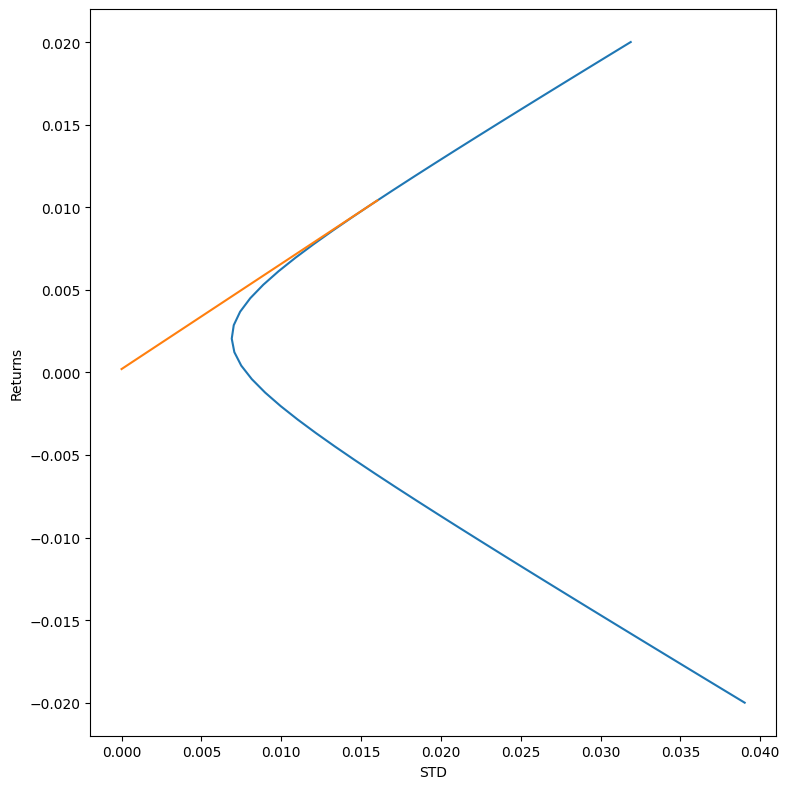

In [284]:
plt.subplots(figsize=(8,8))
y = np.linspace(-0.02, 0.02,50)
x = np.sqrt(A*y**2 + B*y + C)
plt.plot(x, y)

plt.plot(x_values, y_values)
plt.xlabel('STD')
plt.ylabel('Returns')

# Identify the tangency point on efficient frontier where CML touches it.

In [220]:
print("The point of tangency is : " ,sigma_der**(0.5),mu_der)

The point of tangency is :  0.016025777119494107 0.01041337886239616


# Choose 3 of your risky assets and calculate individual security market lines.

In [173]:
#Choosing returns of 3 stocks
returns_3_rand_stock=simple_returns.iloc[:,[0,2,4]]
returns_3_rand_stock

Ticker,HDFCBANK.NS,ICICIBANK.NS,IRCTC.NS
Date,,,
2023-11-20,0.000066,-0.000434,-0.008553
2023-11-21,0.008471,0.005046,0.010908
2023-11-22,-0.003557,-0.003617,-0.012624
2023-11-23,0.005785,0.000271,0.000000
2023-11-24,0.007099,0.006934,-0.010286
...,...,...,...
2024-02-12,-0.009689,-0.014445,-0.041580
2024-02-13,0.003201,0.023793,0.011499
2024-02-14,-0.007458,0.002844,0.020594


In [176]:
expected_returns_3_stocks=np.array(returns_3_rand_stock.mean())
M1=expected_returns_3_stocks
C1=np.array(returns_3_rand_stock.cov())
O1=np.array([1]*3)
w1_der=(np.linalg.inv(C1)@(M1.T-urf*O1.T))/(O1@np.linalg.inv(C1)@(M1.T-urf*O1.T))
u1_der=M1@w1_der
sigma1_der=w1_der.T@C1@w1_der

In [208]:
def get_beta(stock_idx,W_der,Sigma_der,Cov):
  ek=np.array([0]*len(W_der))
  ek[stock_idx]=1
  b=ek@Cov@W_der/Sigma_der
  return b

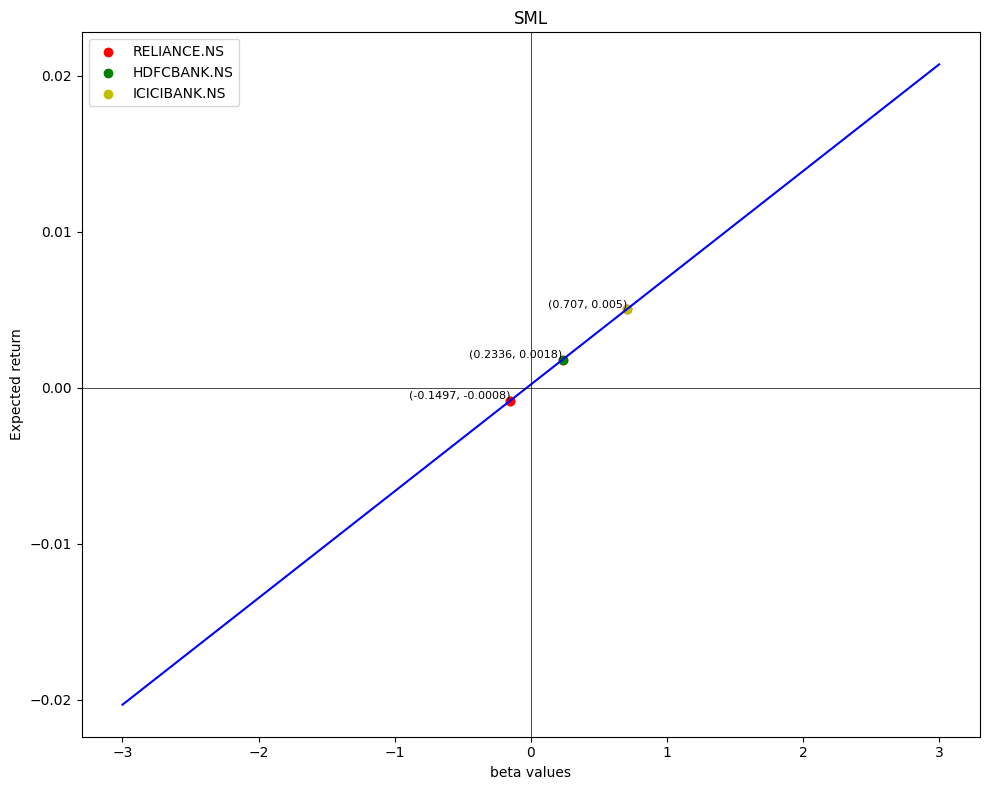

In [209]:
beta_values = np.linspace(-3, 3, 1000)
U_values = (u1_der-urf) * beta_values + urf

beta_points = []
for i in range(3):
  beta_points.append(get_beta(i,w1_der,sigma1_der,C1))

U_points = (u1_der-urf) * np.array(beta_points) + urf
point_labels = [stocks[0], stocks[2], stocks[4]]
plt.figure(figsize=(10, 8))
plt.plot(beta_values, U_values, color='b')
plt.scatter(beta_points, U_points, color='r')

colors = ['r', 'g', 'y']

for i, (x, y, label) in enumerate(zip(beta_points, U_points, point_labels)):

    plt.scatter(x, y, color=colors[i], label=label)
    plt.text(x, y, f'({round(x, 4)}, {round(y, 4)})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.xlabel('beta values')
plt.ylabel('Expected return')
plt.title('SML')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

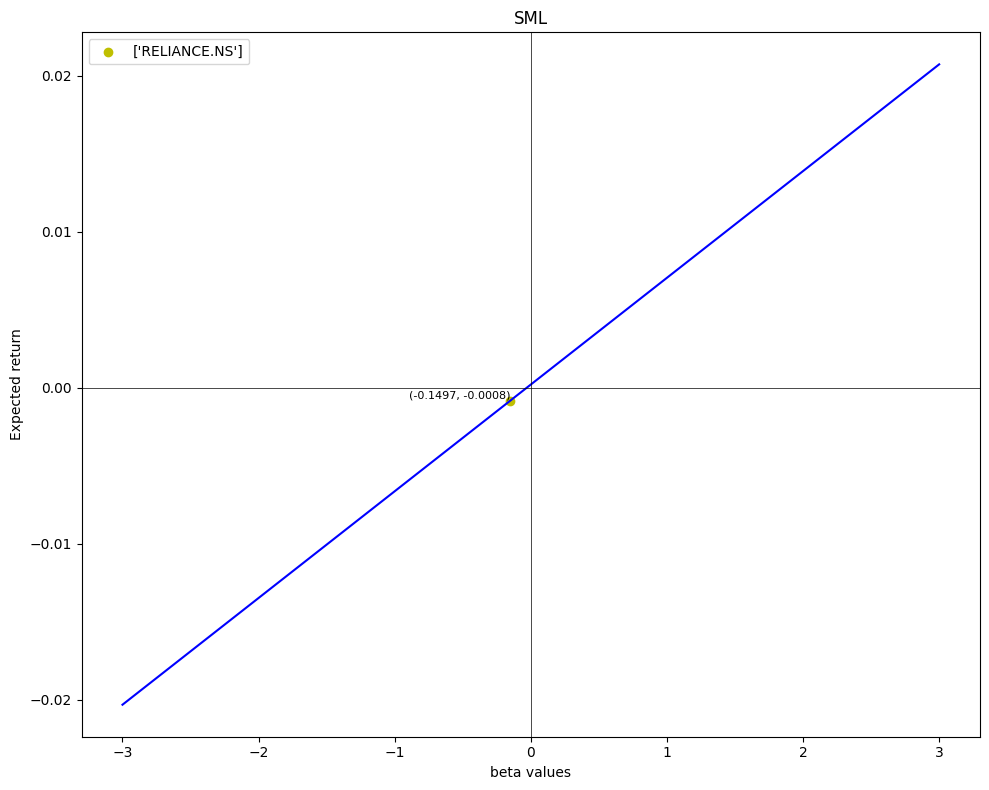

In [210]:
beta_values = np.linspace(-3, 3, 1000)
U_values = (u1_der-urf) * beta_values + urf
U_points = (u1_der-urf) * np.array([get_beta(0,w1_der,sigma1_der,C1)]) + urf
plt.figure(figsize=(10, 8))
plt.plot(beta_values, U_values, color='b')
plt.scatter(get_beta(0,w1_der,sigma1_der,C1), U_points[0], color='y', label=[stocks[0]])
plt.text(get_beta(0,w1_der,sigma1_der,C1), U_points[0], f'({round(get_beta(0,w1_der,sigma1_der,C1), 4)}, {round(U_points[0], 4)})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.xlabel('beta values')
plt.ylabel('Expected return')
plt.title('SML')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

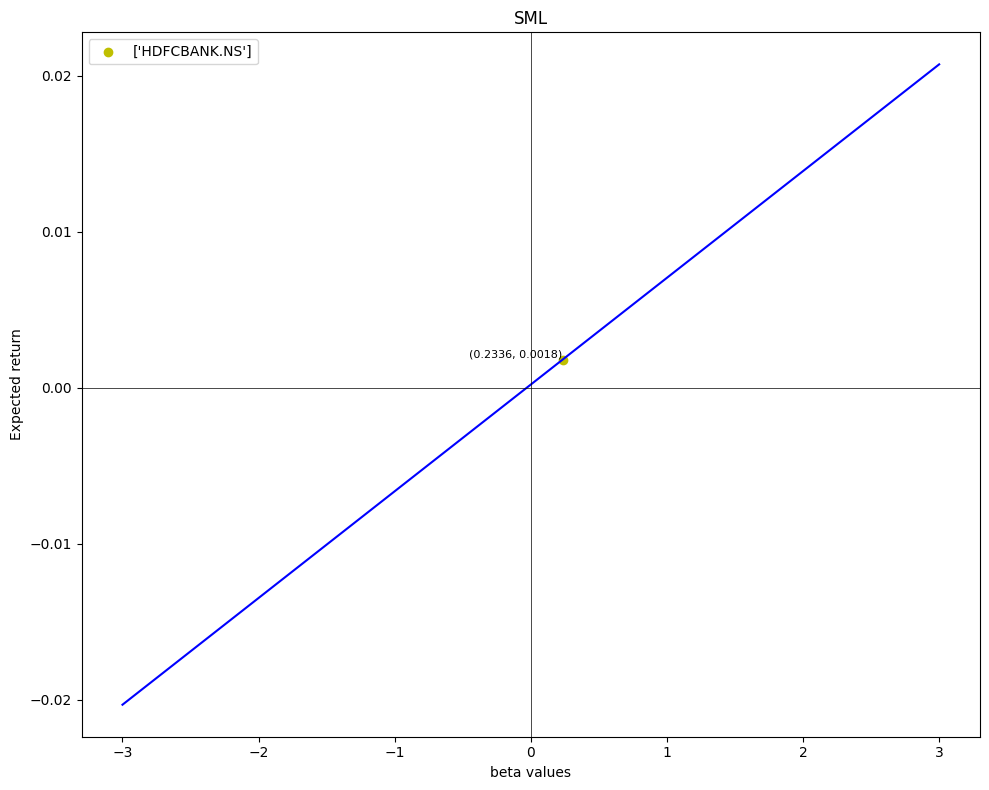

In [211]:
beta_values = np.linspace(-3, 3, 1000)
U_values = (u1_der-urf) * beta_values + urf
U_points = (u1_der-urf) * np.array([get_beta(1,w1_der,sigma1_der,C1)]) + urf
plt.figure(figsize=(10, 8))
plt.plot(beta_values, U_values, color='b')
plt.scatter(get_beta(1,w1_der,sigma1_der,C1), U_points[0], color='y', label=[stocks[2]])
plt.text(get_beta(1,w1_der,sigma1_der,C1), U_points[0], f'({round(get_beta(1,w1_der,sigma1_der,C1), 4)}, {round(U_points[0], 4)})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.xlabel('beta values')
plt.ylabel('Expected return')
plt.title('SML')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

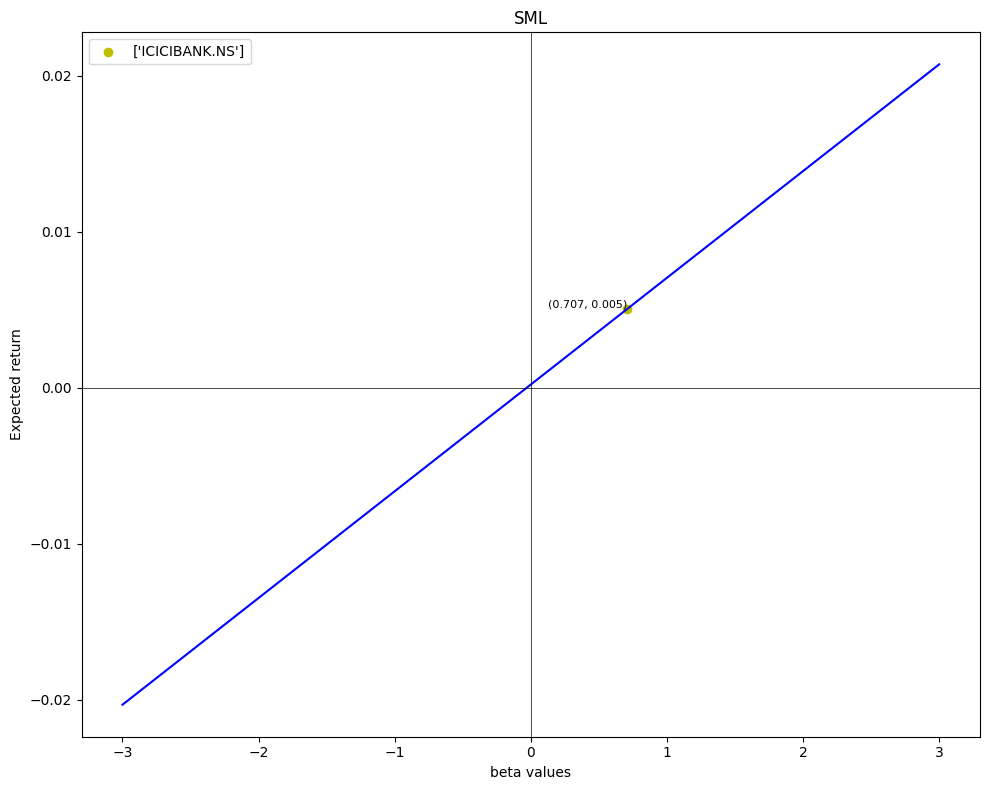

In [212]:
beta_values = np.linspace(-3, 3, 1000)
U_values = (u1_der-urf) * beta_values + urf
U_points = (u1_der-urf) * np.array([get_beta(2,w1_der,sigma1_der,C1)]) + urf
plt.figure(figsize=(10, 8))
plt.plot(beta_values, U_values, color='b')
plt.scatter(get_beta(2,w1_der,sigma1_der,C1), U_points[0], color='y', label=[stocks[4]])
plt.text(get_beta(2,w1_der,sigma1_der,C1), U_points[0], f'({round(get_beta(2,w1_der,sigma1_der,C1), 4)}, {round(U_points[0], 4)})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.xlabel('beta values')
plt.ylabel('Expected return')
plt.title('SML')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

#Calculate relevant performance measures

Sharpe Ratio

In [205]:
# Sharpe ratio of portfolio
mu=np.array(mu)
urf=0.0002
w_der=(np.linalg.inv(C)@(mu.T-urf*O.T))/(O@np.linalg.inv(C)@(mu.T-urf*O.T))
mu_der=mu@w_der
sigma_der=w_der.T@C@w_der
sharpe_ratio=(mu_der-urf)/(sigma_der**(0.5))
print(sharpe_ratio)

0.6373094288184241


In [207]:
# Sharpe ratio of each asset
for i in range(10):
    ret = simple_returns.iloc[:, i]
    U = ret.mean()
    sigma = np.sqrt(ret.var())
    sharpe_ratio = (U - urf) / sigma
    print("Sharpe ratio of",stocks[i]," stock :- ", sharpe_ratio)


Sharpe ratio of RELIANCE.NS  stock :-  -0.06383315784419262
Sharpe ratio of TCS.NS  stock :-  -0.08768088460857129
Sharpe ratio of HDFCBANK.NS  stock :-  0.12051720649504474
Sharpe ratio of INFY.NS  stock :-  0.1574408490353339
Sharpe ratio of ICICIBANK.NS  stock :-  0.17812329138693606
Sharpe ratio of HINDUNILVR.NS  stock :-  0.30979276986142235
Sharpe ratio of MRF.NS  stock :-  0.24613055941152667
Sharpe ratio of TATAMOTORS.NS  stock :-  0.2883231862952543
Sharpe ratio of SBIN.NS  stock :-  0.3315489971346198
Sharpe ratio of IRCTC.NS  stock :-  0.18518732575212313


Treynor Ratio

In [214]:
# Treynor ratio of portfolio
beta_values = []
for i in range(10):
    beta_values.append(get_beta(i, w_der, sigma_der,C))
beta_values = np.array(beta_values)
portfolio_beta = np.dot(w_der.T, beta_values)
portfolio_treynor_ratio = (mu_der - urf) / portfolio_beta
print(portfolio_treynor_ratio )

0.010213378862396155


In [216]:
# Treynor ratio of each asset
for i in range(10):
  print("Treynor Ratio of",stocks[i]," stock :- ",(mu[i]-urf)/beta_values[i])



Treynor Ratio of RELIANCE.NS  stock :-  0.010213378862396155
Treynor Ratio of TCS.NS  stock :-  0.010213378862396165
Treynor Ratio of HDFCBANK.NS  stock :-  0.010213378862396162
Treynor Ratio of INFY.NS  stock :-  0.010213378862396155
Treynor Ratio of ICICIBANK.NS  stock :-  0.010213378862396158
Treynor Ratio of HINDUNILVR.NS  stock :-  0.010213378862396162
Treynor Ratio of MRF.NS  stock :-  0.010213378862396158
Treynor Ratio of TATAMOTORS.NS  stock :-  0.010213378862396158
Treynor Ratio of SBIN.NS  stock :-  0.010213378862396162
Treynor Ratio of IRCTC.NS  stock :-  0.010213378862396158
